In [68]:
import random
import matplotlib.pyplot as plt


# Strategy 1

This strategy represents a player who always chooses the same move in every round of the game. For example, the player may always play "Rock" no matter what the opponent does. This kind of behavior is simple but predictable.

It simulates a naive or stubborn opponent who doesn’t adapt or change their move based on the game’s progress. The purpose of using this strategy in the simulation is to test whether a smart opponent can detect and exploit this predictable behavior over time.

In [22]:
def IsWin(MyMove, OpMove):
  if OpMove == 'Rock' and MyMove == 'Paper':
    return True
  elif OpMove == 'Paper' and MyMove == 'Scissors':
    return True
  elif OpMove == 'Scissors' and MyMove == 'Rock':
    return True
  elif OpMove == MyMove:
    return None
  else:
    return False

In [69]:
def RPS(N,MyMove):
  Wins = 0
  Draws = 0
  for i in range(N):
    OpMove = random.choice(['Rock', 'Paper', 'Scissors'])
    if IsWin(MyMove, OpMove):
      Wins = Wins + 1
    elif IsWin == None:
      Draws = Draws + 1

  print(f"You won: {Wins} times \n")
  print(f"Chance of winning: {(Wins/N)*100} %")
  print(f"You lost: {N-Wins} times \n")
  print(f"Chance of losing: {(1 -(Wins/N))*100} %")
  print(f"Draw: {Draws} times \n")
  print(f"Chance of having a draw: {(Draws/N)*100} %")

  return {'Wins': Wins/N}




In [28]:
YourMove = input("Enter your move: (Rock/Paper/Scissors) \n")
RPS(10000,YourMove)

Enter your move: (Rock/Paper/Scissors) 
Scissors
You won: 3312 times 

Chance of winning: 33.12 %
You lost: 6688 times 

Chance of losing: 66.88000000000001 %
Draw: 0 times 

Chance of having a draw: 0.0 %


# Strategy 2

In [75]:
def Beat(OpMove):
  if OpMove == 'Rock':
    return 'Paper'
  elif OpMove == 'Paper':
    return 'Scissors'
  elif OpMove == 'Scissors':
    return 'Rock'

In [76]:
def RPS2(N):
  Wins = 0
  Draws = 0
  LastMove = None
  Moves = ['Rock', 'Paper', 'Scissors']
  AfterLastMoveGames = {'Rock': 0, 'Paper' : 0, 'Scissors' : 0}
  AfterLastMoveWins = {'Rock': 0, 'Paper' : 0, 'Scissors' : 0}

  for i in range(N):
    OpMove = random.choice(['Rock', 'Paper', 'Scissors']) #First play
    if LastMove == None: #i.e we are in the first round where there's no last moves to my oponents
      MyMove = random.choice (['Rock', 'Paper', 'Scissors']) #Firts play
    else:
      MyMove = Beat(LastMove) #Second play
      AfterLastMoveGames[LastMove] += 1

    if IsWin(MyMove, OpMove):
      Wins = Wins + 1
      if LastMove is not None:
        AfterLastMoveWins[LastMove] += 1
    elif IsWin == None:
      Draws = Draws + 1

    LastMove = OpMove
  print(f"You won: {Wins} times")
  print(f"Chance of winning: {(Wins/N)*100} % \n")
  print(f"You lost: {N-Wins} times")
  print(f"Chance of losing: {(1 -(Wins/N))*100} % \n")
  print(f"Draw: {Draws} times ")
  print(f"Chance of having a draw: {(Draws/N)*100} % \n")
  print("Conditional Probabilities of Winning:")


  Conditional = {}
  for move in Moves:
    count = AfterLastMoveGames[move]
    win = AfterLastMoveWins[move]
    if count > 0:
      prob = win / count
      Conditional[move] = prob
      print(f"P(Win | Last move = {move}): {prob*100}%")
    else:
      Conditional[move] = 0
      print(f"P(Win | Last move = {move}): N/A")
  return {'Wins': Wins/N, 'ConditionalProb': Conditional}

RPS2(10000)

You won: 3341 times
Chance of winning: 33.410000000000004 % 

You lost: 6659 times
Chance of losing: 66.58999999999999 % 

Draw: 0 times 
Chance of having a draw: 0.0 % 

Conditional Probabilities of Winning:
P(Win | Last move = Rock): 32.786387116378%
P(Win | Last move = Paper): 33.66923532898637%
P(Win | Last move = Scissors): 33.77324535092981%


{'Wins': 0.3341,
 'ConditionalProb': {'Rock': 0.32786387116378,
  'Paper': 0.3366923532898637,
  'Scissors': 0.33773245350929815}}

In [77]:
Rock = RPS(10000,'Rock')['Wins']* 100
Paper = RPS(10000,'Paper')['Wins']* 100
Scissors = RPS(10000,'Scissors')['Wins']* 100

RPS2_Result = RPS2(10000)
Cond = RPS2_Result['ConditionalProb']

Rock2 = Cond['Rock']* 100 if Cond['Rock'] is not None else 0
Paper2 = Cond['Paper']* 100 if Cond['Paper'] is not None else 0
Scissors2 = Cond['Scissors']*100 if Cond['Scissors'] is not None else 0

Labels = ['Rock', 'Paper', 'Scissors']
S1 = [Rock, Paper, Scissors]
S2 = [Rock2, Paper2, Scissors2]


You won: 3348 times 

Chance of winning: 33.48 %
You lost: 6652 times 

Chance of losing: 66.52 %
Draw: 0 times 

Chance of having a draw: 0.0 %
You won: 3237 times 

Chance of winning: 32.37 %
You lost: 6763 times 

Chance of losing: 67.63 %
Draw: 0 times 

Chance of having a draw: 0.0 %
You won: 3321 times 

Chance of winning: 33.21 %
You lost: 6679 times 

Chance of losing: 66.78999999999999 %
Draw: 0 times 

Chance of having a draw: 0.0 %
You won: 3269 times
Chance of winning: 32.690000000000005 % 

You lost: 6731 times
Chance of losing: 67.31 % 

Draw: 0 times 
Chance of having a draw: 0.0 % 

Conditional Probabilities of Winning:
P(Win | Last move = Rock): 32.696327261869214%
P(Win | Last move = Paper): 32.08508088675854%
P(Win | Last move = Scissors): 33.27294685990338%


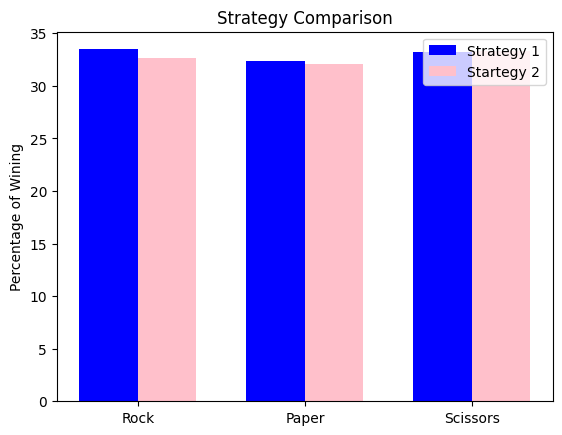

In [87]:
x = range(3)

width = 0.35
plt.bar([i - width/2 for i in x], S1, width=width, label = "Strategy 1", color = 'blue')
plt.bar([i + width/2 for i in x], S2, width=width, label = "Startegy 2", color = 'pink')
plt.xticks(x, Labels)
plt.ylabel('Percentage of Wining')
plt.title('Strategy Comparison')
plt.legend()
plt.show()